In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

Number of Classes: 90
Classes: ['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


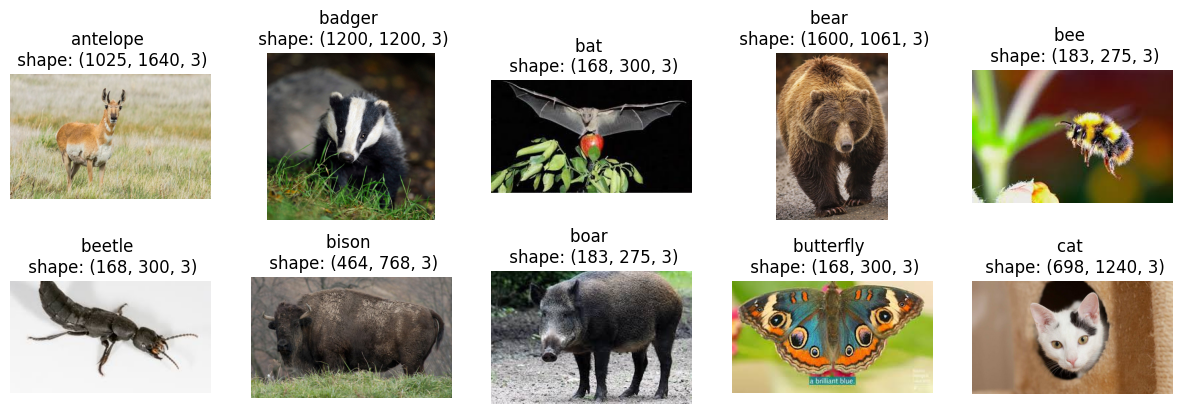

In [2]:
# Set dataset path
dataset_path = r"C:\Users\Gokul\Downloads\archive (1)\animals\animals"

# Get class names
classes = os.listdir(dataset_path)
num_classes = len(classes)

print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

# Visualize sample images
plt.figure(figsize=(15,10))
for i, class_name in enumerate(classes[:10]):
    class_path = os.path.join(dataset_path, class_name)
    img_name = os.listdir(class_path)[0]
    img_path = os.path.join(class_path, img_name)
    img = plt.imread(img_path)
    
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.title(f'{class_name} \n shape: {img.shape}')
    plt.axis('off')
plt.show()


In [3]:
# Image parameters
img_size = (224, 224)
batch_size = 64

# Use MobileNetV2 preprocessing
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.1
)

# Data generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
print("Class Indices:", class_indices)

Found 4860 images belonging to 90 classes.
Found 540 images belonging to 90 classes.
Class Indices: {'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, '

In [4]:
# Load MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Callbacks for best model saving and early stopping
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("best_model.keras", save_best_only=True)
]

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,661,978 (13.97 MB)

 Trainable params: 1,403,994 (5.36 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [5]:
# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=20,
    callbacks=callbacks
)

# fine-tune by unfreezing top layers of base model
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Re-compile for fine-tuning
model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10,
    callbacks=callbacks
)

# Save final model
model.save('MCAR.keras')

c:\Users\Gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.0583 - loss: 4.4675 - val_accuracy: 0.5781 - val_loss: 3.1222
Epoch 2/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 1:09 941ms/step - accuracy: 0.3750 - loss: 3.2875

c:\Users\Gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.3750 - loss: 3.2875 - val_accuracy: 0.5742 - val_loss: 3.1080
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.4606 - loss: 2.8164 - val_accuracy: 0.7598 - val_loss: 1.6851
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.5938 - loss: 2.0505 - val_accuracy: 0.7539 - val_loss: 1.6720
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.6904 - loss: 1.5421 - val_accuracy: 0.7910 - val_loss: 1.0658
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.7656 - loss: 1.2142 - val_accuracy: 0.7852 - val_loss: 1.0609
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.7631 - loss: 1.0165 - val_accuracy: 0.8105 - val_loss: 0.8422
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.7500 - loss: 0.9535 - val_accuracy: 0.8105 - val_loss: 0.8449
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.8257 - loss: 0.7673 - val_accuracy: 0.8184 - val_loss

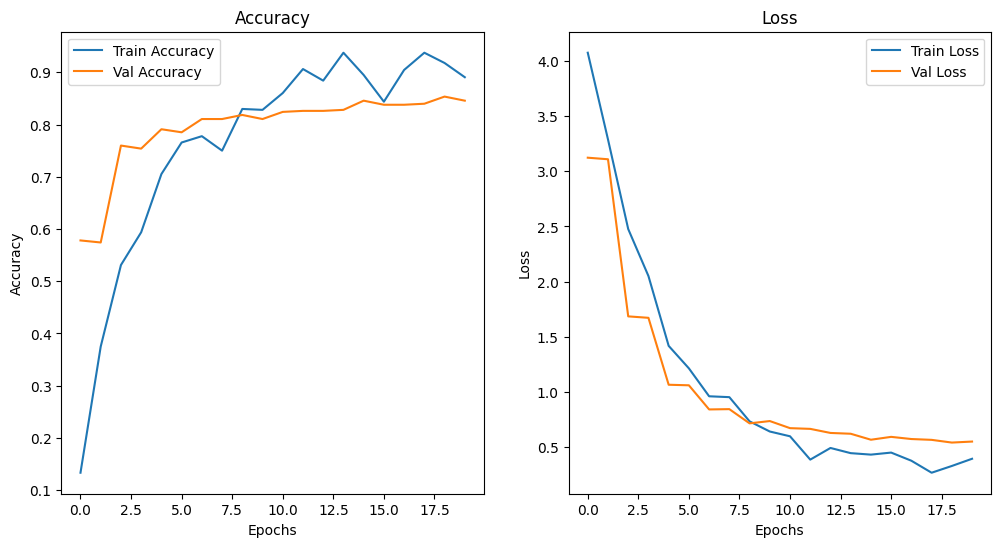

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8414 - loss: 0.4996
Validation Loss: 0.5095
Validation Accuracy: 0.8481


In [6]:
# Plot training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')


9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step
                precision    recall  f1-score   support

      antelope       0.00      0.00      0.00         6
        badger       0.00      0.00      0.00         6
           bat       0.00      0.00      0.00         6
          bear       0.00      0.00      0.00         6
           bee       0.00      0.00      0.00         6
        beetle       0.00      0.00      0.00         6
         bison       0.00      0.00      0.00         6
          boar       0.00      0.00      0.00         6
     butterfly       0.00      0.00      0.00         6
           cat       0.00      0.00      0.00         6
   caterpillar       0.00      0.00      0.00         6
    chimpanzee       0.00      0.00      0.00         6
     cockroach       0.00      0.00      0.00         6
           cow       0.00      0.00      0.00         6
        coyote       0.00      0.00      0.00         6
          crab       0.00      0.00      0.00         6
          

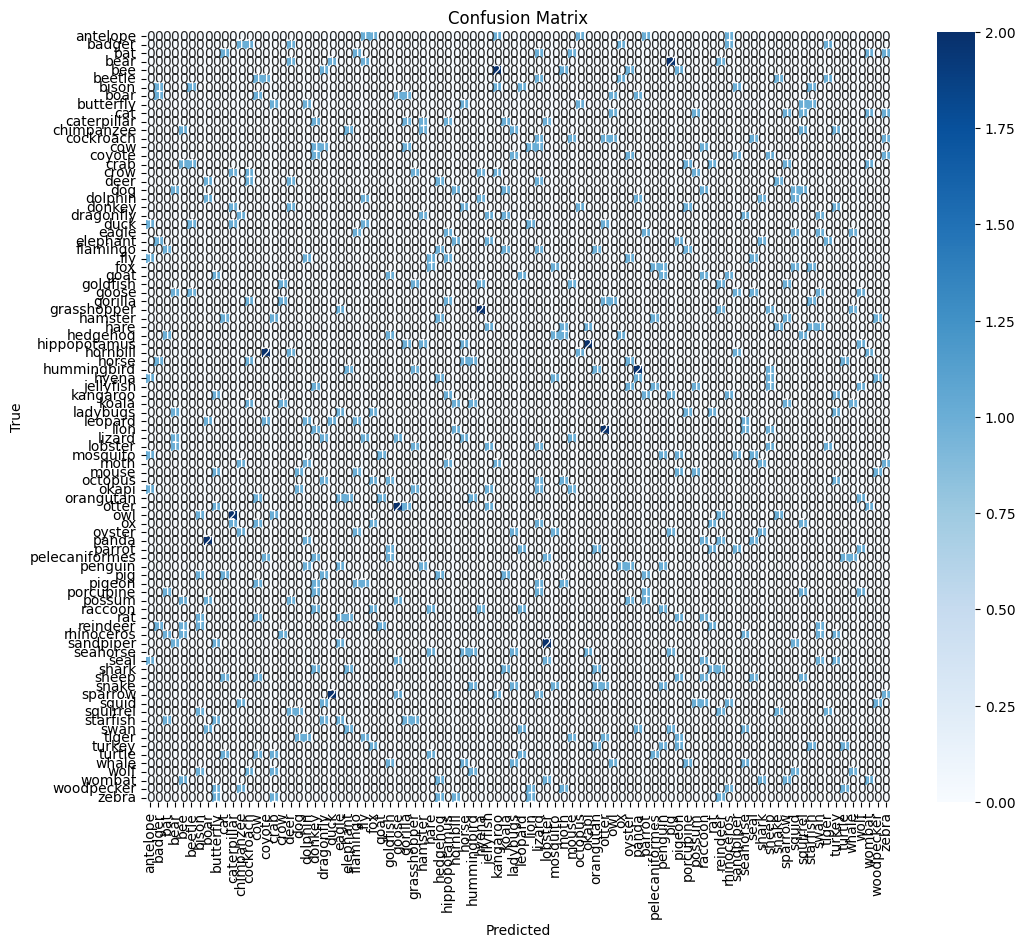

In [7]:
# Classification report & confusion matrix
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [8]:
# Predict function with confidence
def predict_animal(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


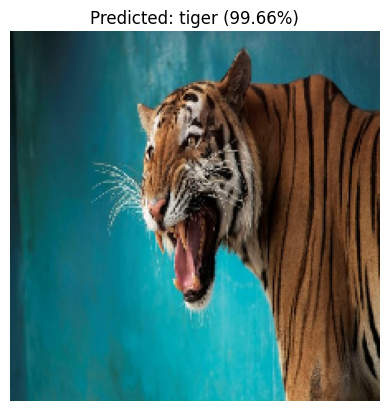

In [9]:
predict_animal(r"C:\Users\Gokul\Downloads\archive (1)\animals\animals\tiger\0a5f5db460.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


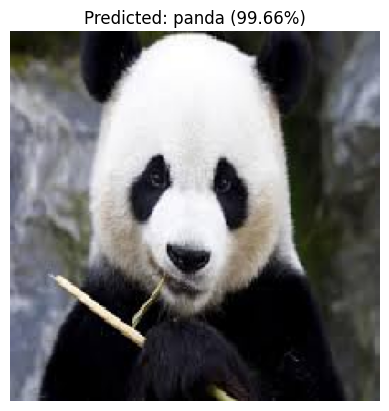

In [10]:
predict_animal(r"C:\Users\Gokul\Downloads\archive (1)\animals\animals\panda\57acebf9bf.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


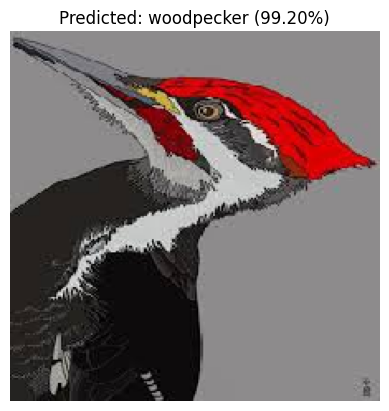

In [11]:
predict_animal(r"C:\Users\Gokul\Downloads\archive (1)\animals\animals\woodpecker\6e320ac2c1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


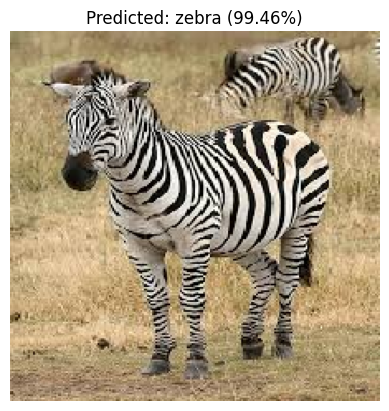

In [12]:
predict_animal(r"C:\Users\Gokul\Downloads\z1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


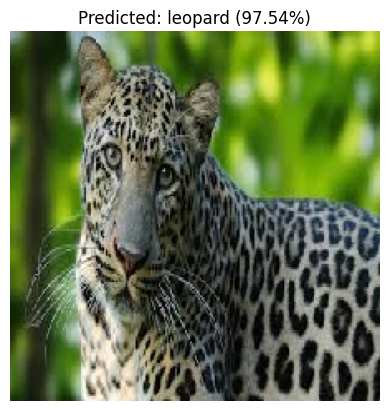

In [14]:
predict_animal(r"C:\Users\Gokul\Downloads\l3.jpg")